<a href="https://colab.research.google.com/github/Jitmandal051004/EEG_Analysis_SOP/blob/main/Grasp_and_Lift_EEG_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/competitions/grasp-and-lift-eeg-detection/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jitmandal24
Your Kaggle Key: ··········
Extracting archive ./grasp-and-lift-eeg-detection/grasp-and-lift-eeg-detection.zip to ./grasp-and-lift-eeg-detection


In [2]:
import zipfile
import os

def extract_zip(zip_file, extract_folder):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)
    print(f"Files extracted to: {extract_folder}")
    os.remove(zip_file)
    print(f"Deleted {zip_file}")

file_paths = ['/content/grasp-and-lift-eeg-detection/train.zip', '/content/grasp-and-lift-eeg-detection/test.zip', "/content/grasp-and-lift-eeg-detection/sample_submission.csv.zip"]
extract_folder = '/content/grasp-and-lift-eeg-detection'

for zip_file in file_paths:
    extract_zip(zip_file, extract_folder)


Files extracted to: /content/grasp-and-lift-eeg-detection
Deleted /content/grasp-and-lift-eeg-detection/train.zip
Files extracted to: /content/grasp-and-lift-eeg-detection
Deleted /content/grasp-and-lift-eeg-detection/test.zip
Files extracted to: /content/grasp-and-lift-eeg-detection
Deleted /content/grasp-and-lift-eeg-detection/sample_submission.csv.zip


In [6]:
!pip install mne --quiet

In [7]:
import numpy as np
import pandas as pd
import mne

                          id  Fp1  Fp2   F7   F3   Fz   F4   F8  FC5  FC1  \
0            subj1_series1_0  -31  363  211  121  211   15  717  279   35   
1            subj1_series1_1  -29  342  216  123  222  200  595  329   43   
2            subj1_series1_2 -172  278  105   93  222  511  471  280   12   
3            subj1_series1_3 -272  263  -52   99  208  511  428  261   27   
4            subj1_series1_4 -265  213  -67   99  155  380  476  353   32   
...                      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
119491  subj1_series1_119491  478  520  377  172  141  118 -123  626   70   
119492  subj1_series1_119492  439  450  298  185  128  502 -331  593   30   
119493  subj1_series1_119493  363  370  278  239  124  768 -410  527   16   
119494  subj1_series1_119494  281  298  318  257  130  736 -556  542   29   
119495  subj1_series1_119495  242  266  234  176  135  617 -622  418   31   

        ...   P7   P3   Pz   P4   P8  PO9   O1   Oz   O2  PO10  
0       ..

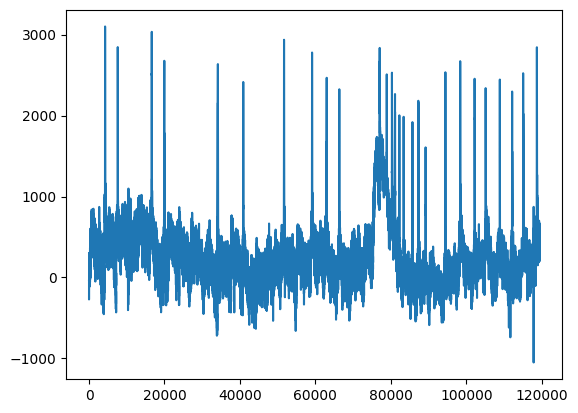

In [8]:
df = pd.read_csv("/content/grasp-and-lift-eeg-detection/train/subj1_series1_data.csv")
print(df)
ch_names = list(df.columns[1:])
print(ch_names)
print(df.columns[1:])

print(df["FC1"].shape)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(df["Fp1"])
plt.show()

In [9]:
scaling_factor = 1e-6
sampling_rate = 500

eeg_data = df.iloc[:, 1:].to_numpy(dtype = float)
eeg_data = eeg_data.T * scaling_factor
n_channels, n_samples = eeg_data.shape
ch_names = list(df.iloc[:, 1:].columns)
ch_types = ['eeg'] * n_channels
print("Number of samples:", n_samples)
print("Number of channels:", n_channels)
print("Channel names:", ch_names)
print("Channel types:", ch_types)
print(eeg_data)
print(eeg_data.shape)

Number of samples: 119496
Number of channels: 32
Channel names: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10']
Channel types: ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']
[[-3.10e-05 -2.90e-05 -1.72e-04 ...  3.63e-04  2.81e-04  2.42e-04]
 [ 3.63e-04  3.42e-04  2.78e-04 ...  3.70e-04  2.98e-04  2.66e-04]
 [ 2.11e-04  2.16e-04  1.05e-04 ...  2.78e-04  3.18e-04  2.34e-04]
 ...
 [ 1.73e-04  1.41e-04  1.41e-04 ... -9.90e-05 -1.22e-04 -6.50e-05]
 [ 1.20e-04  8.30e-05  6.20e-05 ... -2.69e-04 -2.90e-04 -2.29e-04]
 [ 7.04e-04  7.37e-04  6.77e-04 ... -1.21e-04 -7.70e-05 -1.53e-04]]
(32, 119496)


Creating RawArray with float64 data, n_channels=32, n_times=119496
    Range : 0 ... 119495 =      0.000 ...   238.990 secs
Ready.


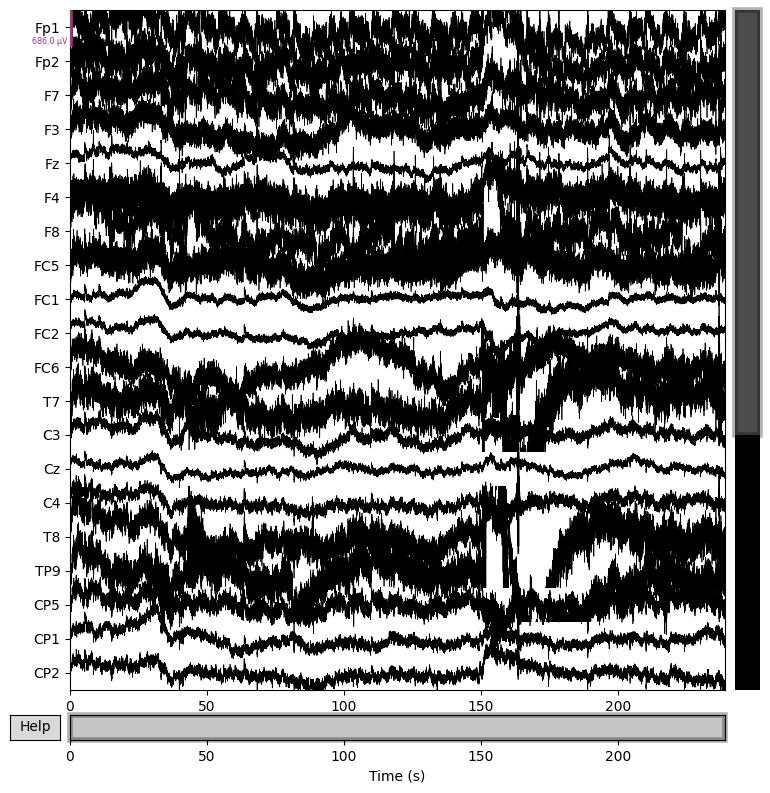

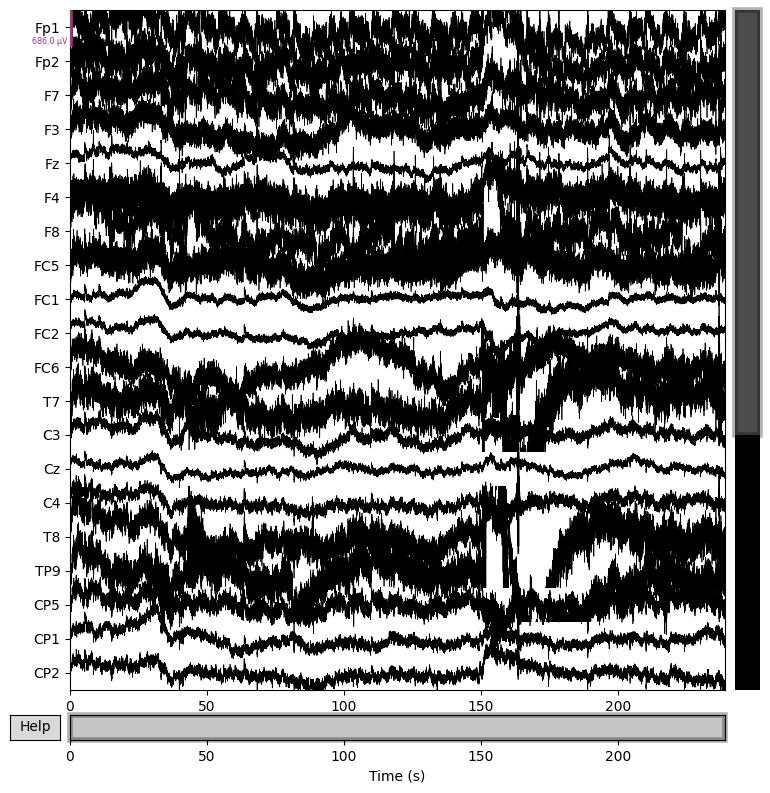

In [12]:
info = mne.create_info(ch_names=ch_names, sfreq=sampling_rate, ch_types=ch_types)
raw = mne.io.RawArray(eeg_data, info)
raw
raw.plot(duration=250, scalings='auto')

### events

                          id  HandStart  FirstDigitTouch  BothStartLoadPhase  \
0            subj1_series1_0          0                0                   0   
1            subj1_series1_1          0                0                   0   
2            subj1_series1_2          0                0                   0   
3            subj1_series1_3          0                0                   0   
4            subj1_series1_4          0                0                   0   
...                      ...        ...              ...                 ...   
119491  subj1_series1_119491          0                0                   0   
119492  subj1_series1_119492          0                0                   0   
119493  subj1_series1_119493          0                0                   0   
119494  subj1_series1_119494          0                0                   0   
119495  subj1_series1_119495          0                0                   0   

        LiftOff  Replace  BothReleased 

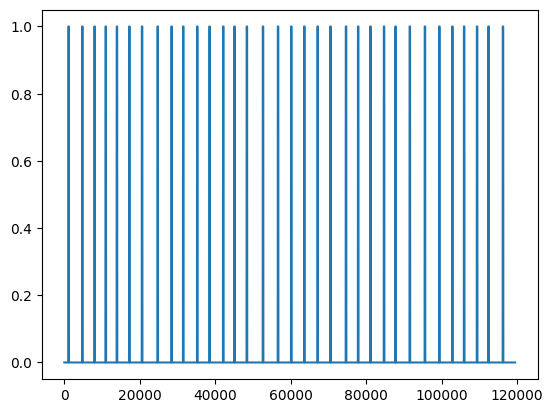

In [13]:
event = pd.read_csv("/content/grasp-and-lift-eeg-detection/train/subj1_series1_events.csv")
eeg_Events = event.iloc[:, 1:].to_numpy()
print(event)
print(f'unique:{event["HandStart"].unique()}')
print(f"eeg_Events:{eeg_Events}")
fig, ax = plt.subplots(1, 1)
ax.plot(event["HandStart"])
plt.show()

In [15]:
print(raw.info)
raw.load_data()

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 32 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 500.0 Hz
>


<RawArray | 32 x 119496 (239.0 s), ~29.2 MiB, data loaded>

In [22]:
events_name = event.columns[1:]
events_name = events_name.to_list()
event_ids = {name: i+1 for i, name in enumerate(events_name)}
print(events_name)
print(event_ids)

['HandStart', 'FirstDigitTouch', 'BothStartLoadPhase', 'LiftOff', 'Replace', 'BothReleased']
{'HandStart': 1, 'FirstDigitTouch': 2, 'BothStartLoadPhase': 3, 'LiftOff': 4, 'Replace': 5, 'BothReleased': 6}


In [34]:
all_events = []
for i, name in enumerate(events_name):
  event_signal = event[name].to_numpy()
  onset_indices = np.where(np.diff(event_signal, prepend=0) == 1)[0]
  print(onset_indices)
  events = np.column_stack((onset_indices, np.zeros_like(onset_indices), event_ids[name] * np.ones_like(onset_indices)))
  all_events.append(events)
  print(events)
print(all_events)
print("==========="*14)
all_events = np.vstack(all_events)
print(all_events)
print("==========="*14)
all_events = all_events[np.argsort(all_events[:, 0])]
print(all_events)
print("Events shape:", all_events.shape)
print("First few events:\n", all_events[:5])
print("Event IDs:", event_ids)

[  1068   4708   7947  10905  13872  17175  20532  24674  28357  31449
  35167  38421  42051  45032  48308  52583  56569  60082  63540  67062
  70469  74580  77806  81059  84659  87704  91490  95496  99321 102770
 105885 109314 112351 116177]
[[  1068      0      1]
 [  4708      0      1]
 [  7947      0      1]
 [ 10905      0      1]
 [ 13872      0      1]
 [ 17175      0      1]
 [ 20532      0      1]
 [ 24674      0      1]
 [ 28357      0      1]
 [ 31449      0      1]
 [ 35167      0      1]
 [ 38421      0      1]
 [ 42051      0      1]
 [ 45032      0      1]
 [ 48308      0      1]
 [ 52583      0      1]
 [ 56569      0      1]
 [ 60082      0      1]
 [ 63540      0      1]
 [ 67062      0      1]
 [ 70469      0      1]
 [ 74580      0      1]
 [ 77806      0      1]
 [ 81059      0      1]
 [ 84659      0      1]
 [ 87704      0      1]
 [ 91490      0      1]
 [ 95496      0      1]
 [ 99321      0      1]
 [102770      0      1]
 [105885      0      1]
 [109314     

Not setting metadata
204 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 204 events and 501 original time points ...
0 bad epochs dropped
HandStart


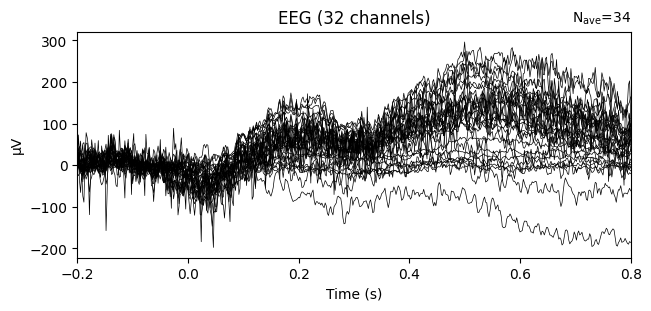

Figure(640x300)
FirstDigitTouch


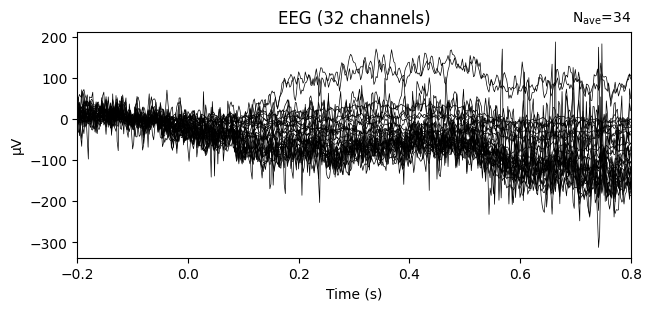

Figure(640x300)
BothStartLoadPhase


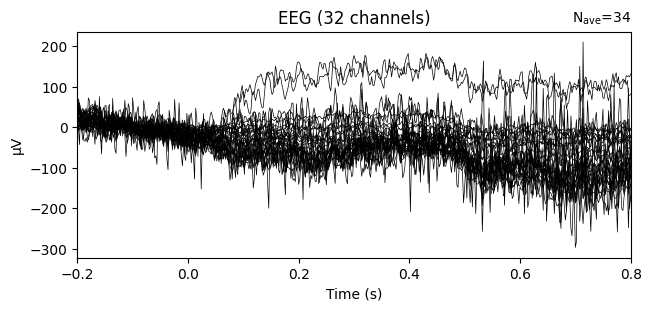

Figure(640x300)
LiftOff


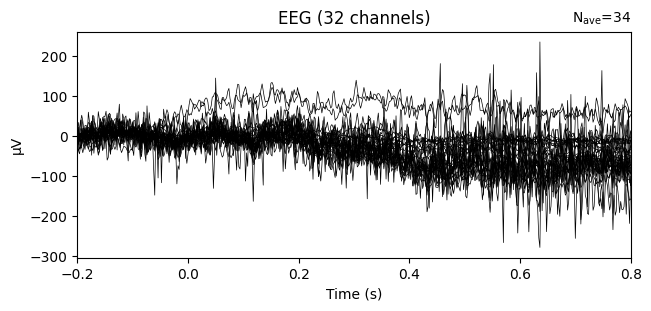

Figure(640x300)
Replace


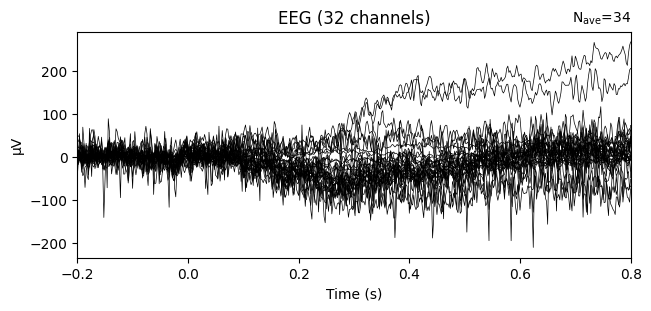

Figure(640x300)
BothReleased


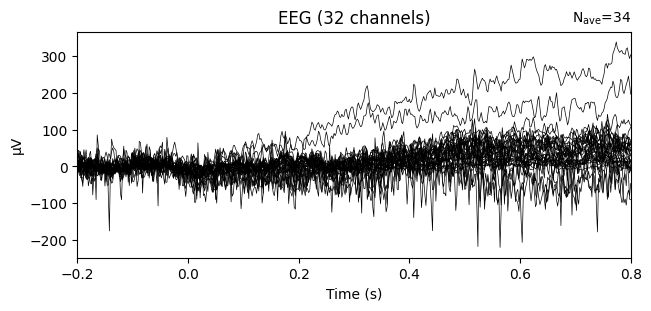

Figure(640x300)


In [44]:
epochs = mne.Epochs(raw, all_events, event_id=event_ids, tmin=-0.2, tmax=0.8, baseline=(None, 0), preload=True)
for name in events_name:
  print(name)
  print(epochs[name].average().plot())

HandStart
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Figure(1000x350)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


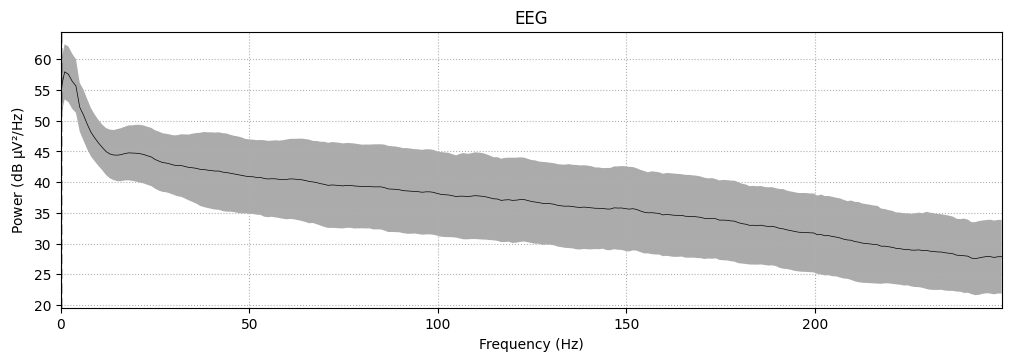

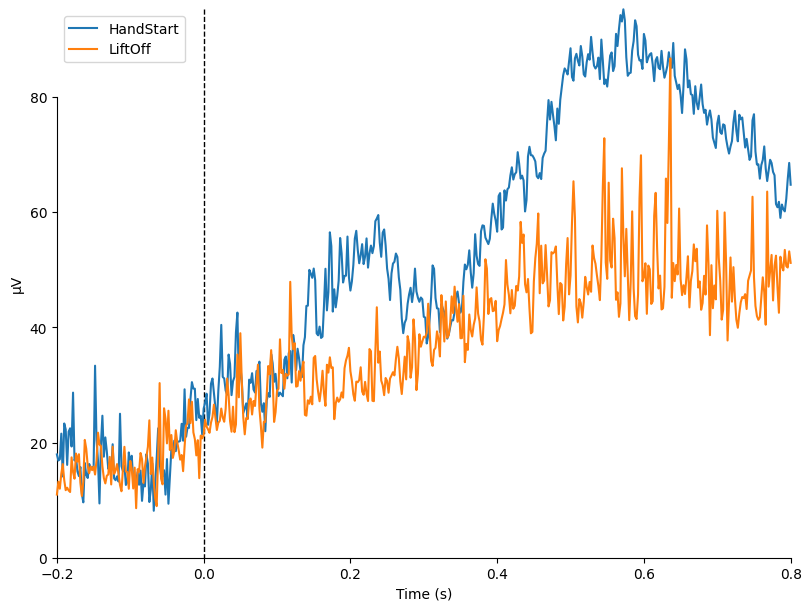

FirstDigitTouch
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Figure(1000x350)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


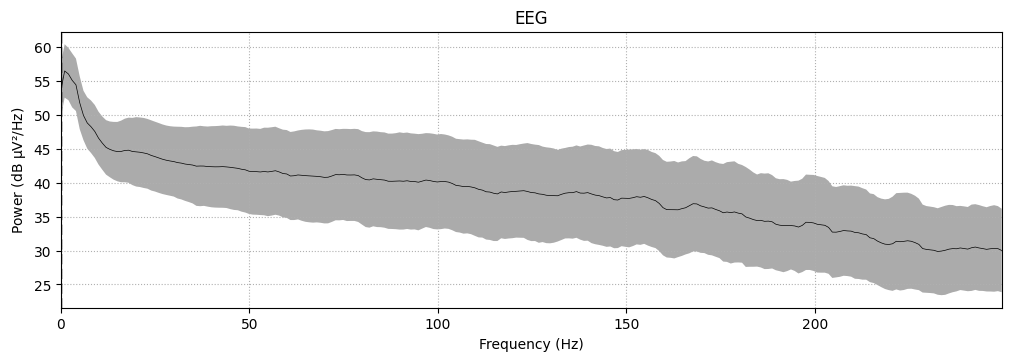

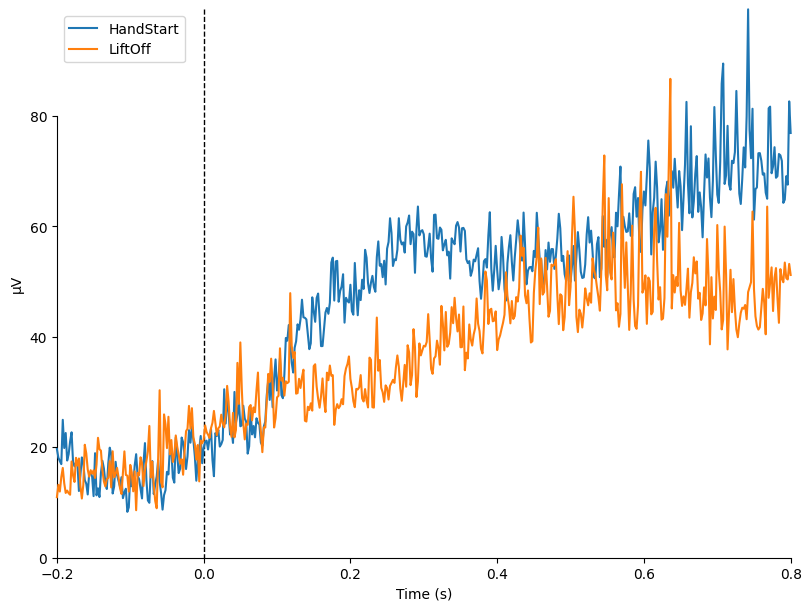

BothStartLoadPhase
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Figure(1000x350)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


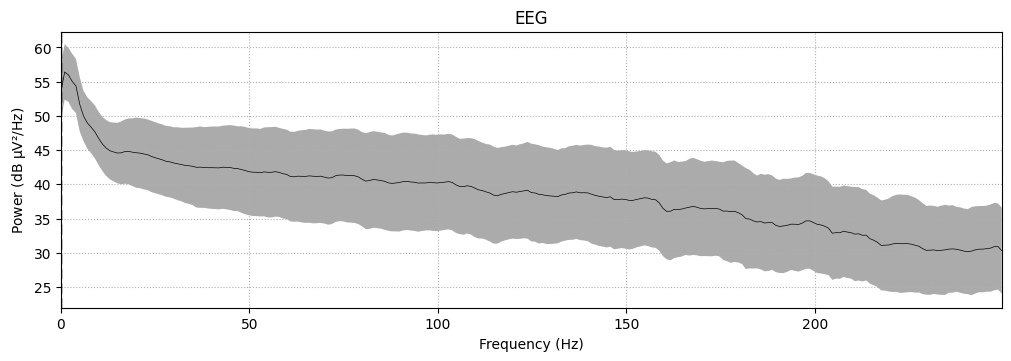

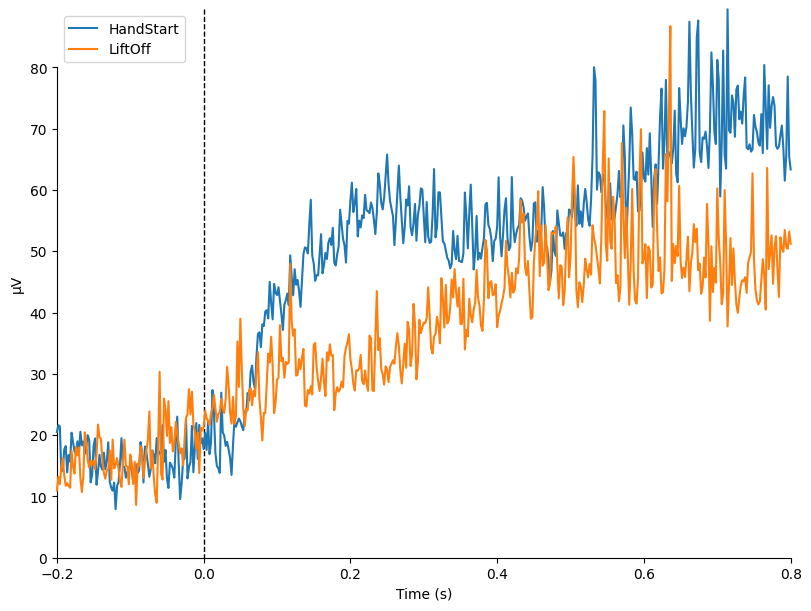

LiftOff
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Figure(1000x350)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


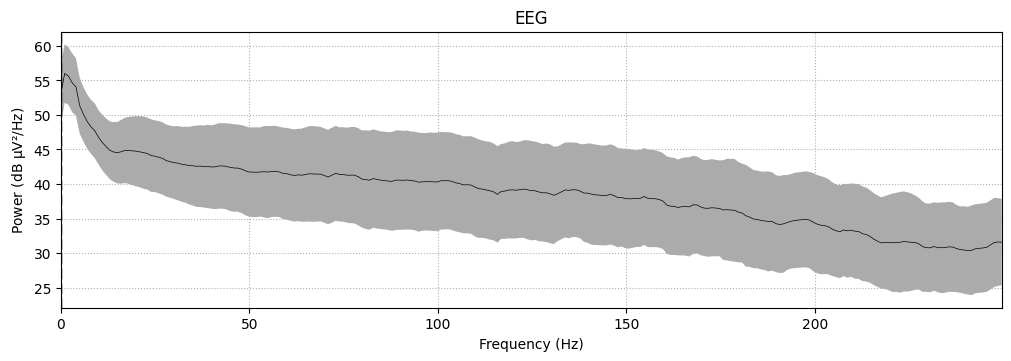

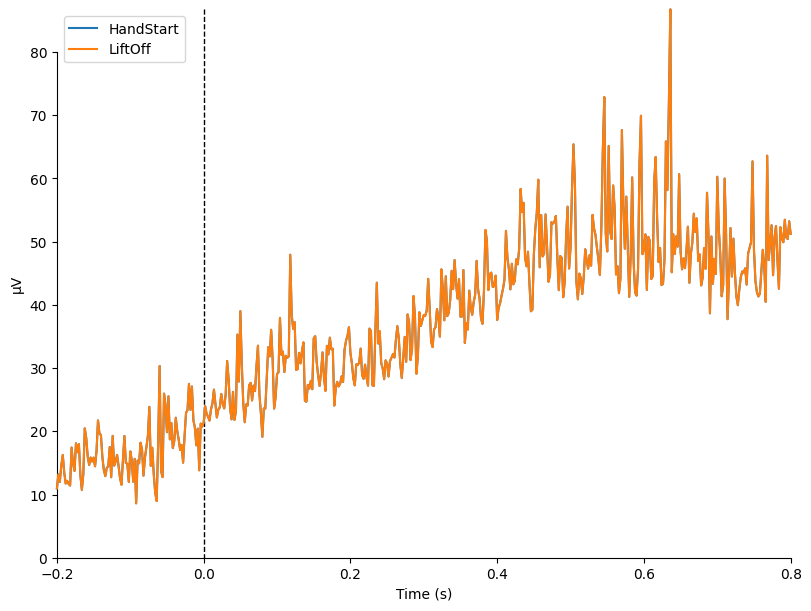

Replace
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Figure(1000x350)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


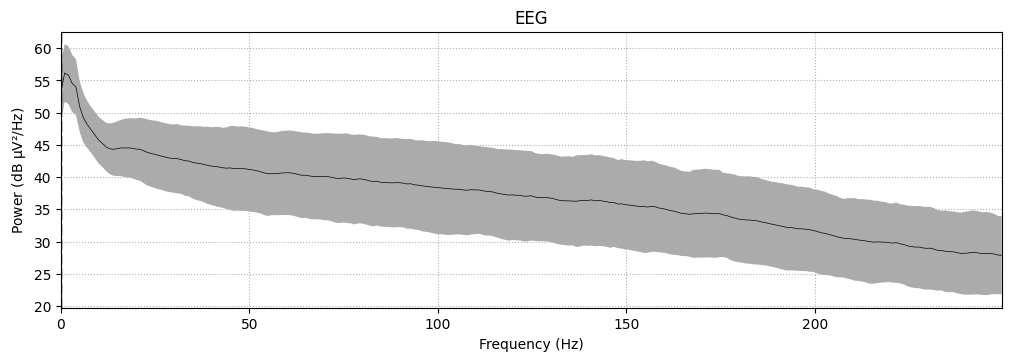

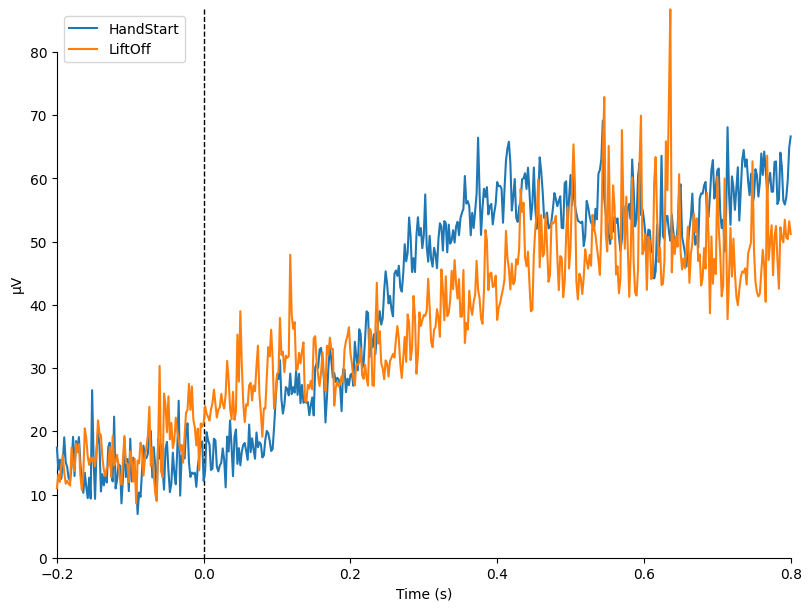

BothReleased
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Figure(1000x350)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


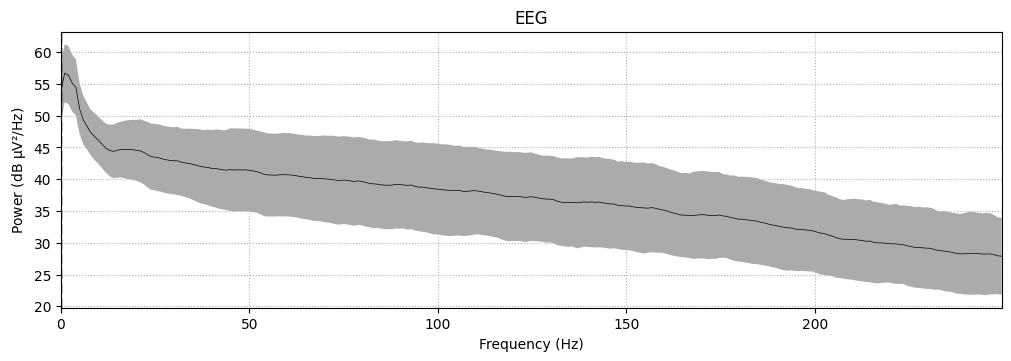

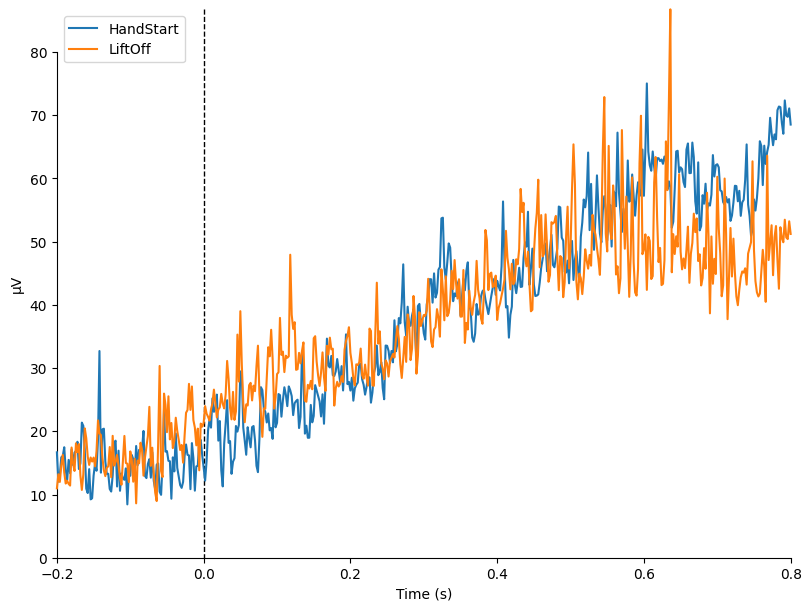

In [45]:
for name in events_name:
  print(name)
  print(epochs[name].compute_psd(average=True))
  evoked1 = epochs[name].average()
  mne.viz.plot_compare_evokeds({'HandStart': evoked1, 'LiftOff': evoked2})


combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


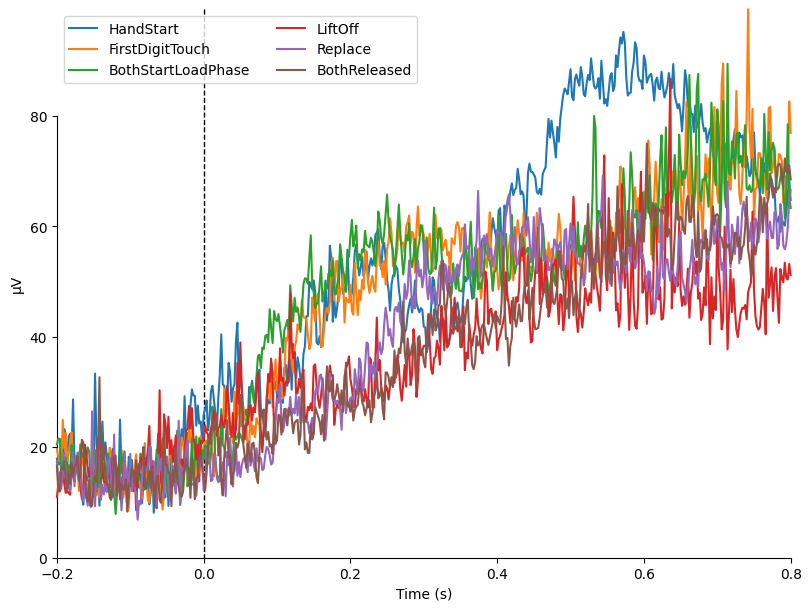

[<Figure size 800x600 with 1 Axes>]

In [58]:
evoked_arr = [epochs[event_name].average() for event_name in event_ids.keys()]

plot_dict = {event_name: evoked for event_name, evoked in zip(event_ids.keys(), evoked_arr)}

mne.viz.plot_compare_evokeds(plot_dict)